# Crimes in Boston

## Table of contents
* [Introduction](#introduction)
* [Dataset](#dataset)
* [Method](#method)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)
* [References](#reference)

## Introduction <a name="introduction"></a>

Crime rates vary from place to place depending on many factors. Crimes include but not limit to murders, rapes, robberies, assaults, burglaries, thefts, auto thefts, arson, law enforcement employees, police officers and so on. They can be categorized into two types e.g., violent crimes and property crime. A violent crime is a crime in which an offender or perpetrator uses or threatens to use force upon a victim. This entails both crimes in which the violent act is the objective, such as murder or rape, as well as crimes in which violence is the means to an end (Wikipedia). Property crime, on the other hand, is a crime that includes, among other crimes, burglary, larceny, theft, motor vehicle theft, arson, shoplifting, and vandalism. Property crime is a crime to obtain money, property, or some other benefit. This may involve force, or the threat of force, in cases like robbery or extortion (Wikipedia). The crime cost per annual in the United Of America have been estimated from \\$690 billion up to \\$3.41 trillion [1]. Understanding the crimes' nature and roots is very crucial for individual, society, and nation as a whole. First of all, it can help individual better prepare themselves not to become the victim. It can also help society to take action to minimize crime rate for the safety and wealth of the community. Moreover, reducing crime rate can help a country minimizing its expense on social safety and increasing the harmony of the people. 

In this study, I aim at integrating the crime data in Boston with the Fourquare map data to identify the relatioship between crime types and districts that crimes happened with the venues in the Foursquare. The relationship can reveal what kind of crimes more often happen in a specific area of Boston city.  

## Dataset <a name="dataset"></a>

Thee datasets are used in this study including **i)** list of United States cities by crime rate [2], **ii)** US crime incident report [3], and **iii)** Foursquare [4]. In this section, we shall explore the data by using visualization techniques to get a quick understanding of the data at hand.  

In US crime incident dataset, we select only three features from the whole dataset. They are including **city**, **total violent crime**, and **total property crime**. These three feature can tell us which city is safer comparing to the others. In the Boston crime dataset which is our main objective of the project, we select some features such as **OFFENSE_CODE_GROUP**, **District**, **Latitude**, and **Longitude** to integrate with Foursquare dataset to work on map later.  

Whenever we make a call to Foursquare database, we get a list of name, unique ID, location, and category which can be integrate with crime data that also contain the location. Hence, utilizing these two datasets can help us identify the relaship between crimes and venues.  

# Method <a name="method"></a>

In this analysis, two main methods including **visualization** and **clustering** are adopted. Visualization is an effective method to explore data before we apply any data mining or machine learning methods. It also gives us a quick understanding of our data so that we can investigate the interesting problems later.  
Moreover, clustering methods aim at grouping the data based on their characteristics. In our problem, clusterig method can be used to cluster the neighborhoods of the districts in Boston from our crime data based on their venues that obtained from Foursquare. Crime data also contain different features which are types and numbers of crimes that happened in those districts.  

**Below we illustrate the data exploration**

In [375]:
# Importing some libraries to work on

import numpy as np
# import k-means from clustering stage
from sklearn.cluster import KMeans
import requests # library to handle requests
#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import pandas as pd
from matplotlib.pyplot import figure
import seaborn as sns
from scipy.stats import powerlaw

In [376]:
#!pip install powerlaw

  Stored in directory: /Users/rathapech/Library/Caches/pip/wheels/e0/27/02/08d0e2865072bfd8d7c655e290521e3feca3fc22f1ac460601
Successfully built powerlaw


First of all, we give an overview of the crime rate in many cities around US which obtain from Wikipedia. 

In [298]:
# Reading the first dataset
# URL of the data to be read from wiki
url_data = 'https://en.wikipedia.org/wiki/List_of_United_States_cities_by_crime_rate'

The following table of United States cities by crime rate is based on Federal Bureau of Investigation Uniform Crime Reports statistics from 2017 for the top 100 most populous cities in America that have reported data to the FBI UCR system

In [299]:
# Using pandas to read html
df_wiki = pd.read_html(url_data, header =0, flavor = 'bs4')

# Capture only the table data
df = df_wiki[0]
df.shape

(101, 13)

In [300]:
df.head()

State       City  Population Violent crime  \
0    State       City  Population         Total   
1  Alabama    Mobile3      248431        740.25   
2   Alaska  Anchorage      296188       1203.29   
3  Arizona   Chandler      249355        259.47   
4  Arizona    Gilbert      242090         85.51   

                        Violent crime.1 Violent crime.2 Violent crime.3  \
0  Murder and Nonnegligent manslaughter           Rape1         Robbery   
1                                 20.13           57.16          177.11   
2                                  9.12          132.01          262.67   
3                                  2.01           52.13           56.95   
4                                  2.07           16.11           21.07   

      Violent crime.4 Property crime Property crime.1 Property crime.2  \
0  Aggravated assault          Total         Burglary    Larceny-theft   
1              485.85        5453.83          1216.84          3730.21   
2              799.49        5415.82           748.17          3619.66   
3              148.38        2329.61           314.41          1866.01   
4               46.26        1385.85           192.49          1137.59   

      Property crime.3  Arson2  
0  Motor vehicle theft  Arson2  
1               506.78   22.94  
2              1047.98   20.93  
3               149.18     NaN  
4                55.76   12.39

In [301]:
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header #set the header row as the df header

In [302]:
df.head()

0    State       City Population    Total  \
1  Alabama    Mobile3     248431   740.25   
2   Alaska  Anchorage     296188  1203.29   
3  Arizona   Chandler     249355   259.47   
4  Arizona    Gilbert     242090    85.51   
5  Arizona   Glendale     249273   488.22   

0 Murder and Nonnegligent manslaughter   Rape1 Robbery Aggravated assault  \
1                                20.13   57.16  177.11             485.85   
2                                 9.12  132.01  262.67             799.49   
3                                 2.01   52.13   56.95             148.38   
4                                 2.07   16.11   21.07              46.26   
5                                 4.81   38.91  192.96             251.53   

0    Total Burglary Larceny-theft Motor vehicle theft Arson2  
1  5453.83  1216.84       3730.21              506.78  22.94  
2  5415.82   748.17       3619.66             1047.98  20.93  
3  2329.61   314.41       1866.01              149.18    NaN  
4  1385.85   192.49       1137.59               55.76  12.39  
5  4530.37   637.45       3426.36              466.56  19.26

In [311]:
df.columns.values[3] = "Violent"
df.columns.values[8] = "Property"
df.head()

0    State       City Population  Violent  \
1  Alabama    Mobile3     248431   740.25   
2   Alaska  Anchorage     296188  1203.29   
3  Arizona   Chandler     249355   259.47   
4  Arizona    Gilbert     242090    85.51   
5  Arizona   Glendale     249273   488.22   

0 Murder and Nonnegligent manslaughter   Rape1 Robbery Aggravated assault  \
1                                20.13   57.16  177.11             485.85   
2                                 9.12  132.01  262.67             799.49   
3                                 2.01   52.13   56.95             148.38   
4                                 2.07   16.11   21.07              46.26   
5                                 4.81   38.91  192.96             251.53   

0 Property Burglary Larceny-theft Motor vehicle theft Arson2  
1  5453.83  1216.84       3730.21              506.78  22.94  
2  5415.82   748.17       3619.66             1047.98  20.93  
3  2329.61   314.41       1866.01              149.18    NaN  
4  1385.85   192.49       1137.59               55.76  12.39  
5  4530.37   637.45       3426.36              466.56  19.26

In [327]:
df_city_crime = df[['City','Violent','Property']]
# Drop NaN records
df_city_crime = df_city_crime.dropna() 
df_city_crime.shape

(96, 3)

In [313]:
df_city_crime.head()

0       City  Violent Property
1    Mobile3   740.25  5453.83
2  Anchorage  1203.29  5415.82
3   Chandler   259.47  2329.61
4    Gilbert    85.51  1385.85
5   Glendale   488.22  4530.37

## Using visualization to explore the dataset

Plotting violent crime rate by city

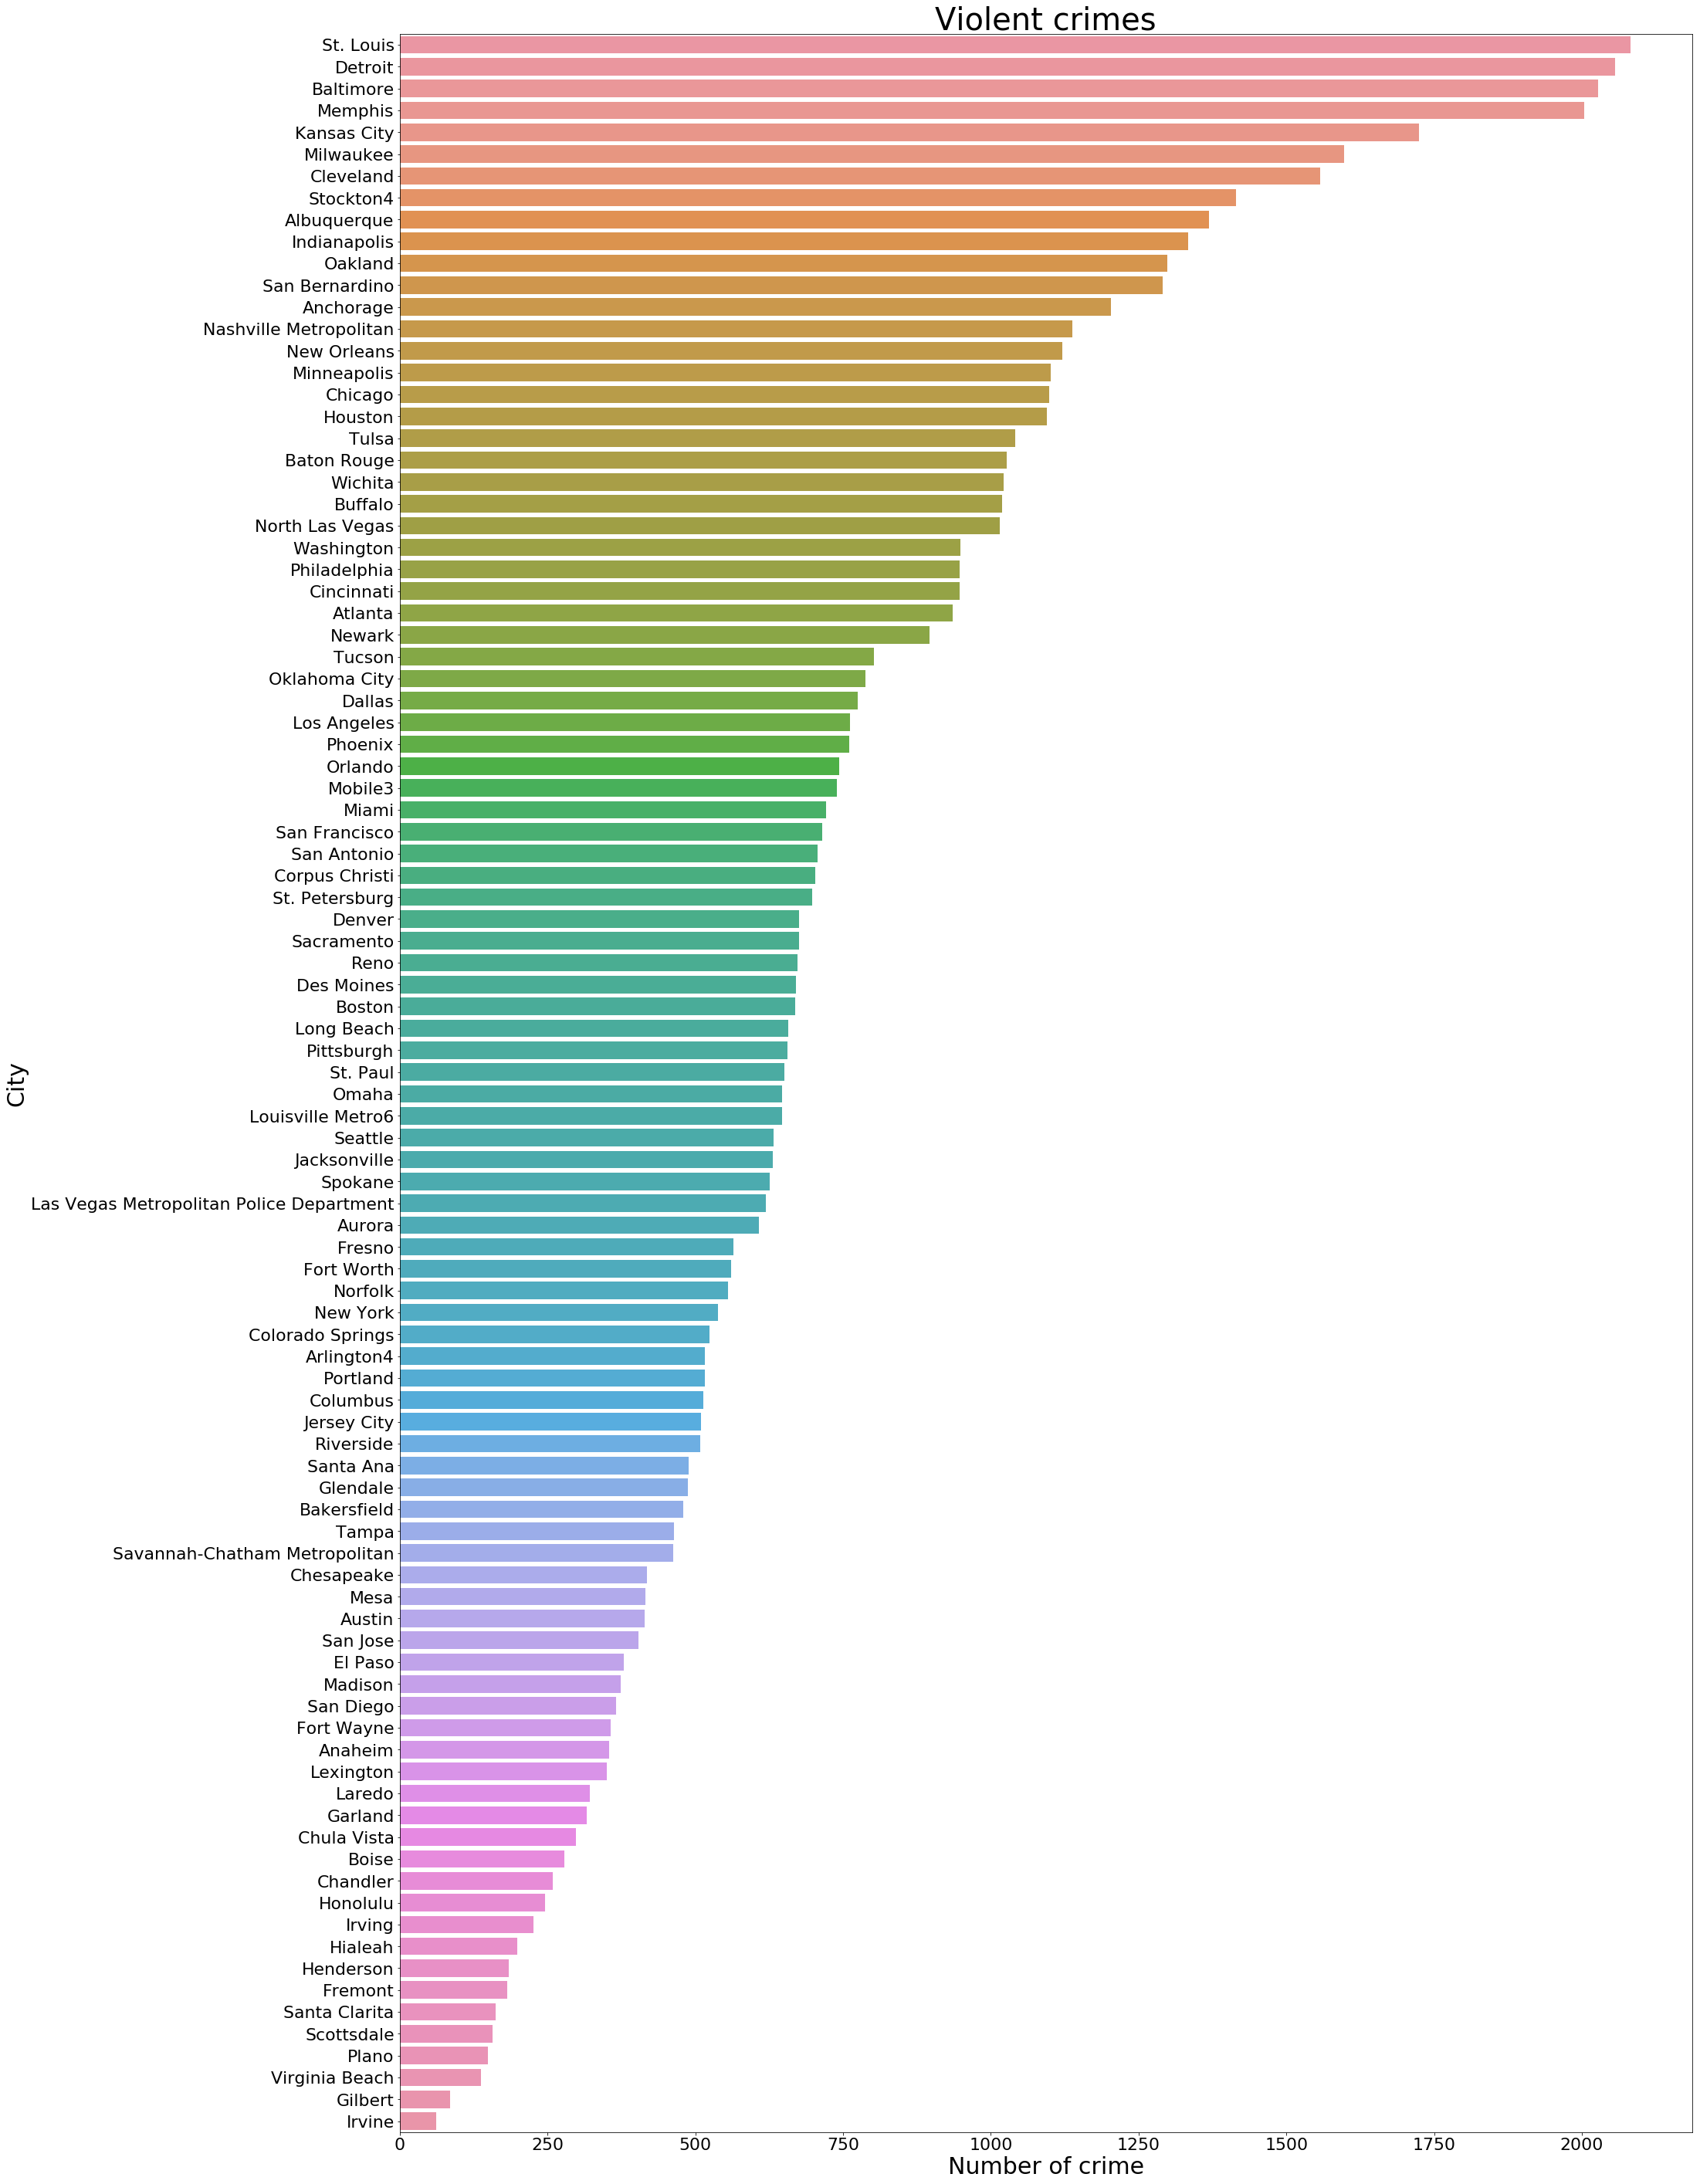

In [324]:
df_city_crime["Violent"] = pd.to_numeric(df_city_crime["Violent"])
df_city_crime = df_city_crime.sort_values("Violent", ascending=False)

f, ax = plt.subplots(figsize=(30, 50))
bar = sns.barplot(x="Violent", y="City", data=df_city_crime)
bar.axes.set_title("Violent crimes",fontsize=40)
bar.set_ylabel("City",fontsize=30)
bar.set_xlabel("Number of crime",fontsize=30)
bar.tick_params(labelsize=22)

Plotting propert crime rate

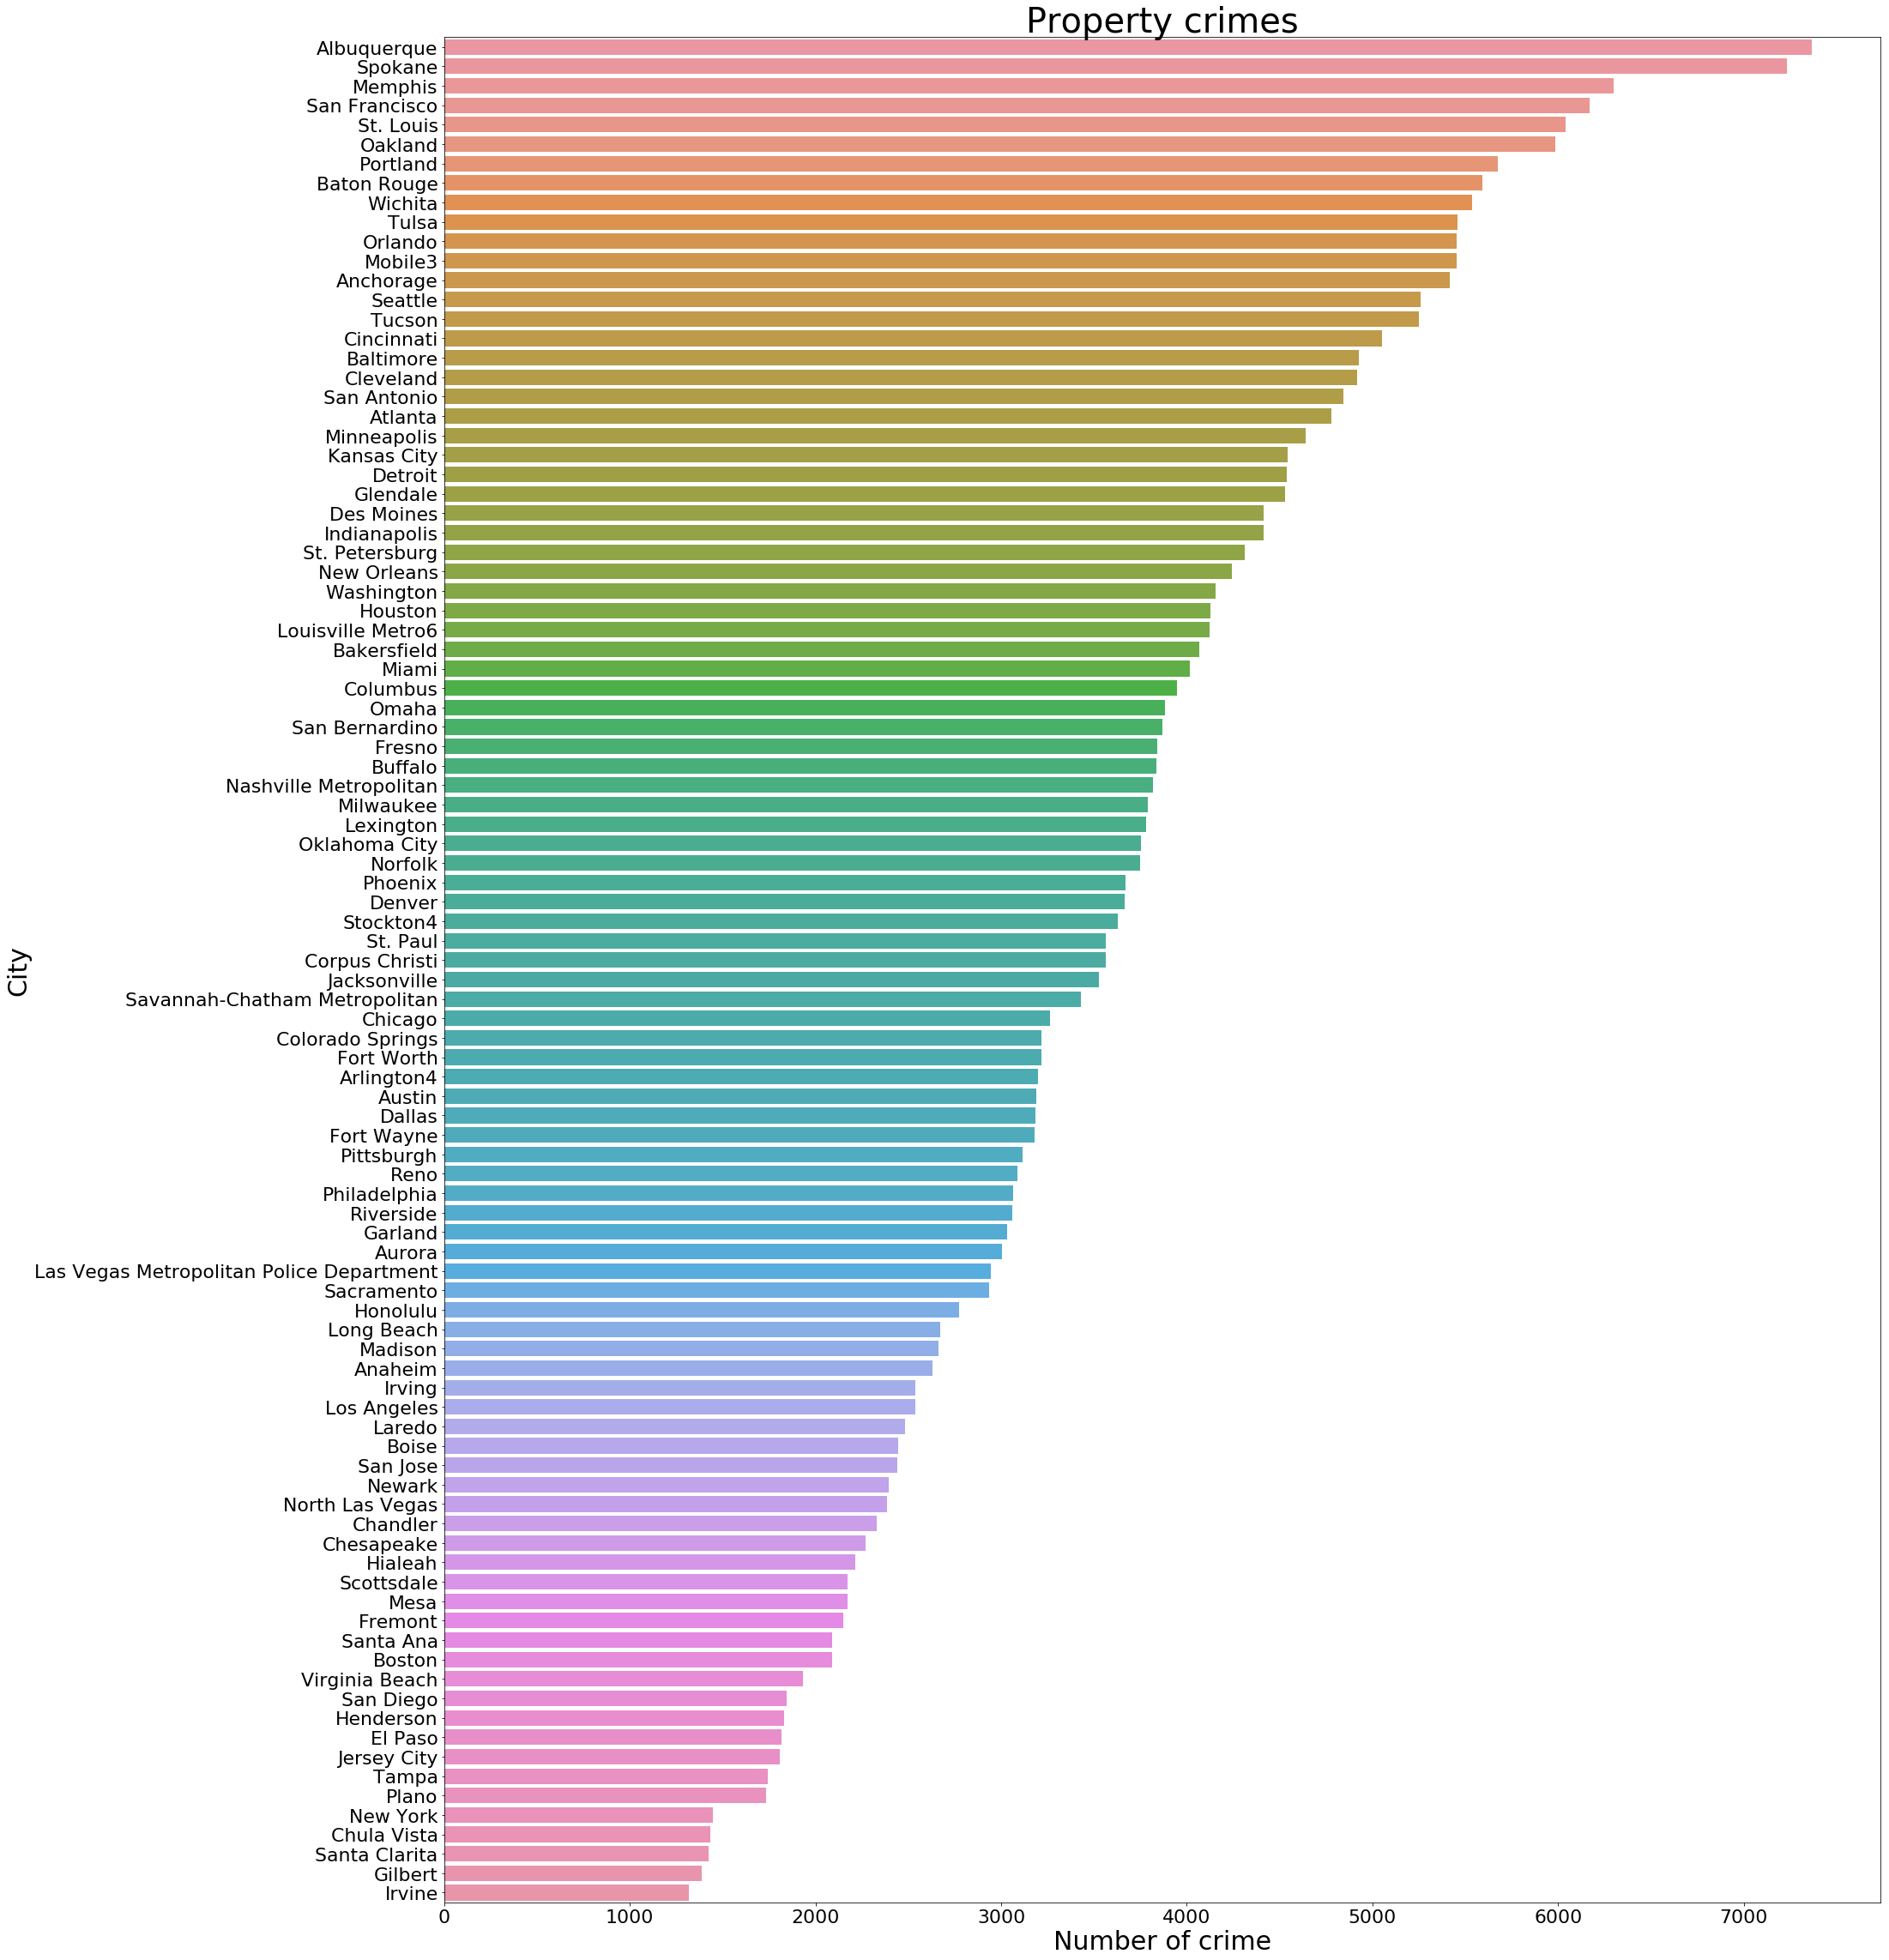

In [326]:
df_city_crime["Property"] = pd.to_numeric(df_city_crime["Property"])
df_city_crime = df_city_crime.sort_values("Property", ascending=False)

f, ax = plt.subplots(figsize=(30, 40))
bar = sns.barplot(x="Property", y="City", data=df_city_crime)
bar.axes.set_title("Property crimes",fontsize=40)
bar.set_ylabel("City",fontsize=30)
bar.set_xlabel("Number of crime",fontsize=30)
bar.tick_params(labelsize=22)


### Exploring **Boston** crime dataset

In [441]:
df_boston = pd.read_csv('tmpxcahxwwg.csv')
#df_la_long = pd.read_csv('Geospatial_Coordinates.csv')

In [442]:
df_boston.head()

INCIDENT_NUMBER  OFFENSE_CODE    OFFENSE_CODE_GROUP  \
0      I192056355          2647                 Other   
1      I192056350           520  Residential Burglary   
2      I192056348          2900                 Other   
3      I192056346           613               Larceny   
4      I192056345          1402             Vandalism   

                   OFFENSE_DESCRIPTION DISTRICT REPORTING_AREA SHOOTING  \
0            THREATS TO DO BODILY HARM       B3            422      NaN   
1       BURGLARY - RESIDENTIAL - FORCE       B2            585      NaN   
2  VAL - VIOLATION OF AUTO LAW - OTHER       B2            566      NaN   
3                  LARCENY SHOPLIFTING       A7             26      NaN   
4                            VANDALISM       B3            427      NaN   

      OCCURRED_ON_DATE  YEAR  MONTH DAY_OF_WEEK  HOUR  UCR_PART  \
0  2019-07-21 20:21:00  2019      7      Sunday    20  Part Two   
1  2019-07-21 21:08:00  2019      7      Sunday    21  Part One   
2  2019-07-21 19:27:00  2019      7      Sunday    19  Part Two   
3  2019-07-21 20:48:00  2019      7      Sunday    20  Part One   
4  2019-07-21 20:16:00  2019      7      Sunday    20  Part Two   

                STREET        Lat       Long                     Location  
0             RIVER ST  42.271330 -71.082999  (42.27133005, -71.08299865)  
1             JUDGE ST  42.329454 -71.102712  (42.32945358, -71.10271179)  
2  AMERICAN LEGION HWY  42.294999 -71.093066  (42.29499937, -71.09306615)  
3            BORDER ST  42.376203 -71.039799  (42.37620267, -71.03979926)  
4         FESSENDEN ST  42.278560 -71.091997  (42.27855984, -71.09199697)

Let cleaning the data by dropping some columns that are never been used. 

In [443]:
df_boston.drop(columns=["INCIDENT_NUMBER", "OFFENSE_CODE","OFFENSE_DESCRIPTION", "SHOOTING", "UCR_PART", "STREET", 
                        "Location","OCCURRED_ON_DATE"], inplace = True)
df_boston.head()

OFFENSE_CODE_GROUP DISTRICT REPORTING_AREA  YEAR  MONTH DAY_OF_WEEK  \
0                 Other       B3            422  2019      7      Sunday   
1  Residential Burglary       B2            585  2019      7      Sunday   
2                 Other       B2            566  2019      7      Sunday   
3               Larceny       A7             26  2019      7      Sunday   
4             Vandalism       B3            427  2019      7      Sunday   

   HOUR        Lat       Long  
0    20  42.271330 -71.082999  
1    21  42.329454 -71.102712  
2    19  42.294999 -71.093066  
3    20  42.376203 -71.039799  
4    20  42.278560 -71.091997

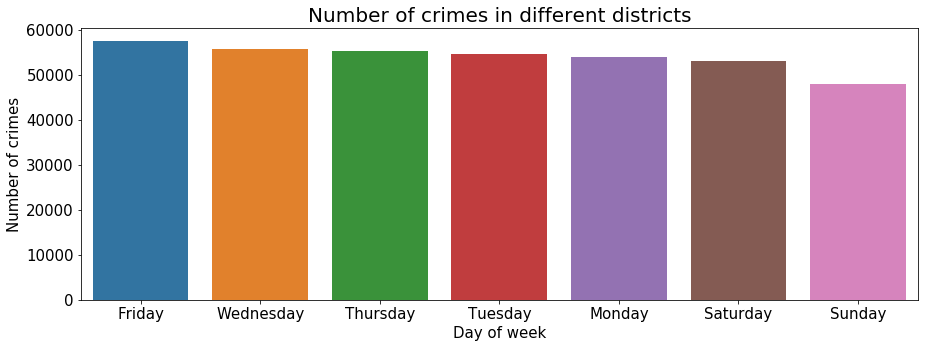

In [501]:
df_boston_dow = (df_boston.groupby(['DAY_OF_WEEK']).size().reset_index(name='COUNT'))
df_boston_dow = df_boston_dow.sort_values(by='COUNT', ascending=False)
f, ax = plt.subplots(figsize=(15, 5))
bar = sns.barplot(y="COUNT", x="DAY_OF_WEEK", data=df_boston_dow)
bar.set_title("Number of crimes in different districts", fontsize=20)
bar.set_ylabel("Number of crimes",fontsize=15)
bar.set_xlabel("Day of week",fontsize=15)
bar.tick_params(labelsize=15)

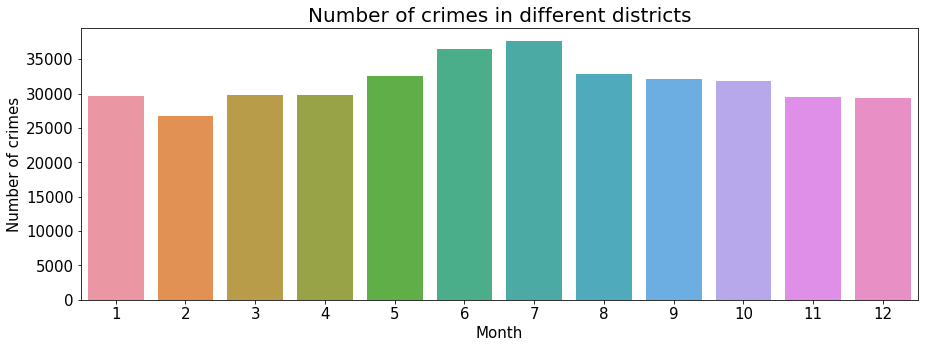

In [500]:
df_boston_m = (df_boston.groupby(['MONTH']).size().reset_index(name='COUNT'))
#df_boston_m = df_boston_m.sort_values(by='COUNT', ascending=True)
f, ax = plt.subplots(figsize=(15, 5))
bar = sns.barplot(y="COUNT", x="MONTH", data=df_boston_m)
bar.set_title("Number of crimes in different districts", fontsize=20)
bar.set_ylabel("Number of crimes",fontsize=15)
bar.set_xlabel("Month",fontsize=15)
bar.tick_params(labelsize=15)

**Comparing the above figure with below figure that illustrate the weather in Boston over a year.**

<img src="average_temperature_Boston.png"
     alt="Markdown Monster icon"
     style="float: left; margin-right: 10px;" />

[logo]:average-temperature-united-states-of-america-boston.png  "Logo Title Text 2"

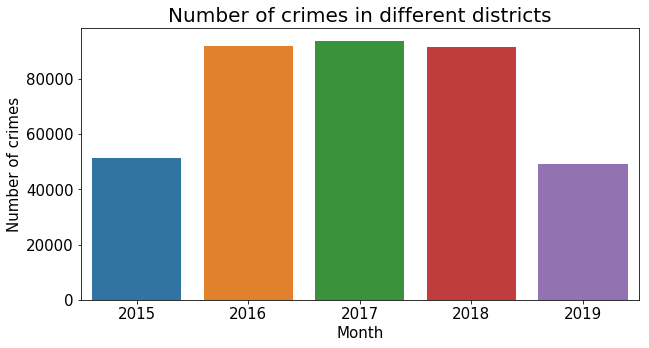

In [503]:
df_boston_y = (df_boston.groupby(['YEAR']).size().reset_index(name='COUNT'))
#df_boston_m = df_boston_m.sort_values(by='COUNT', ascending=True)
f, ax = plt.subplots(figsize=(10, 5))
bar = sns.barplot(y="COUNT", x="YEAR", data=df_boston_y)
bar.set_title("Number of crimes in different districts", fontsize=20)
bar.set_ylabel("Number of crimes",fontsize=15)
bar.set_xlabel("Month",fontsize=15)
bar.tick_params(labelsize=15)

In [444]:
df_code_group = df_boston[['OFFENSE_CODE_GROUP']]
df_code_group.head()

OFFENSE_CODE_GROUP
0                 Other
1  Residential Burglary
2                 Other
3               Larceny
4             Vandalism

In [445]:
count_crime = df_code_group.groupby('OFFENSE_CODE_GROUP').size().to_frame('Number of crime')
count_crime['OFFENSE_CODE_GROUP'] = count_crime.index
count_crime.head()

Number of crime  \
OFFENSE_CODE_GROUP                                  
Aggravated Assault                          10095   
Aircraft                                       57   
Arson                                         108   
Assembly or Gathering Violations             1115   
Auto Theft                                   5891   

                                                OFFENSE_CODE_GROUP  
OFFENSE_CODE_GROUP                                                  
Aggravated Assault                              Aggravated Assault  
Aircraft                                                  Aircraft  
Arson                                                        Arson  
Assembly or Gathering Violations  Assembly or Gathering Violations  
Auto Theft                                              Auto Theft

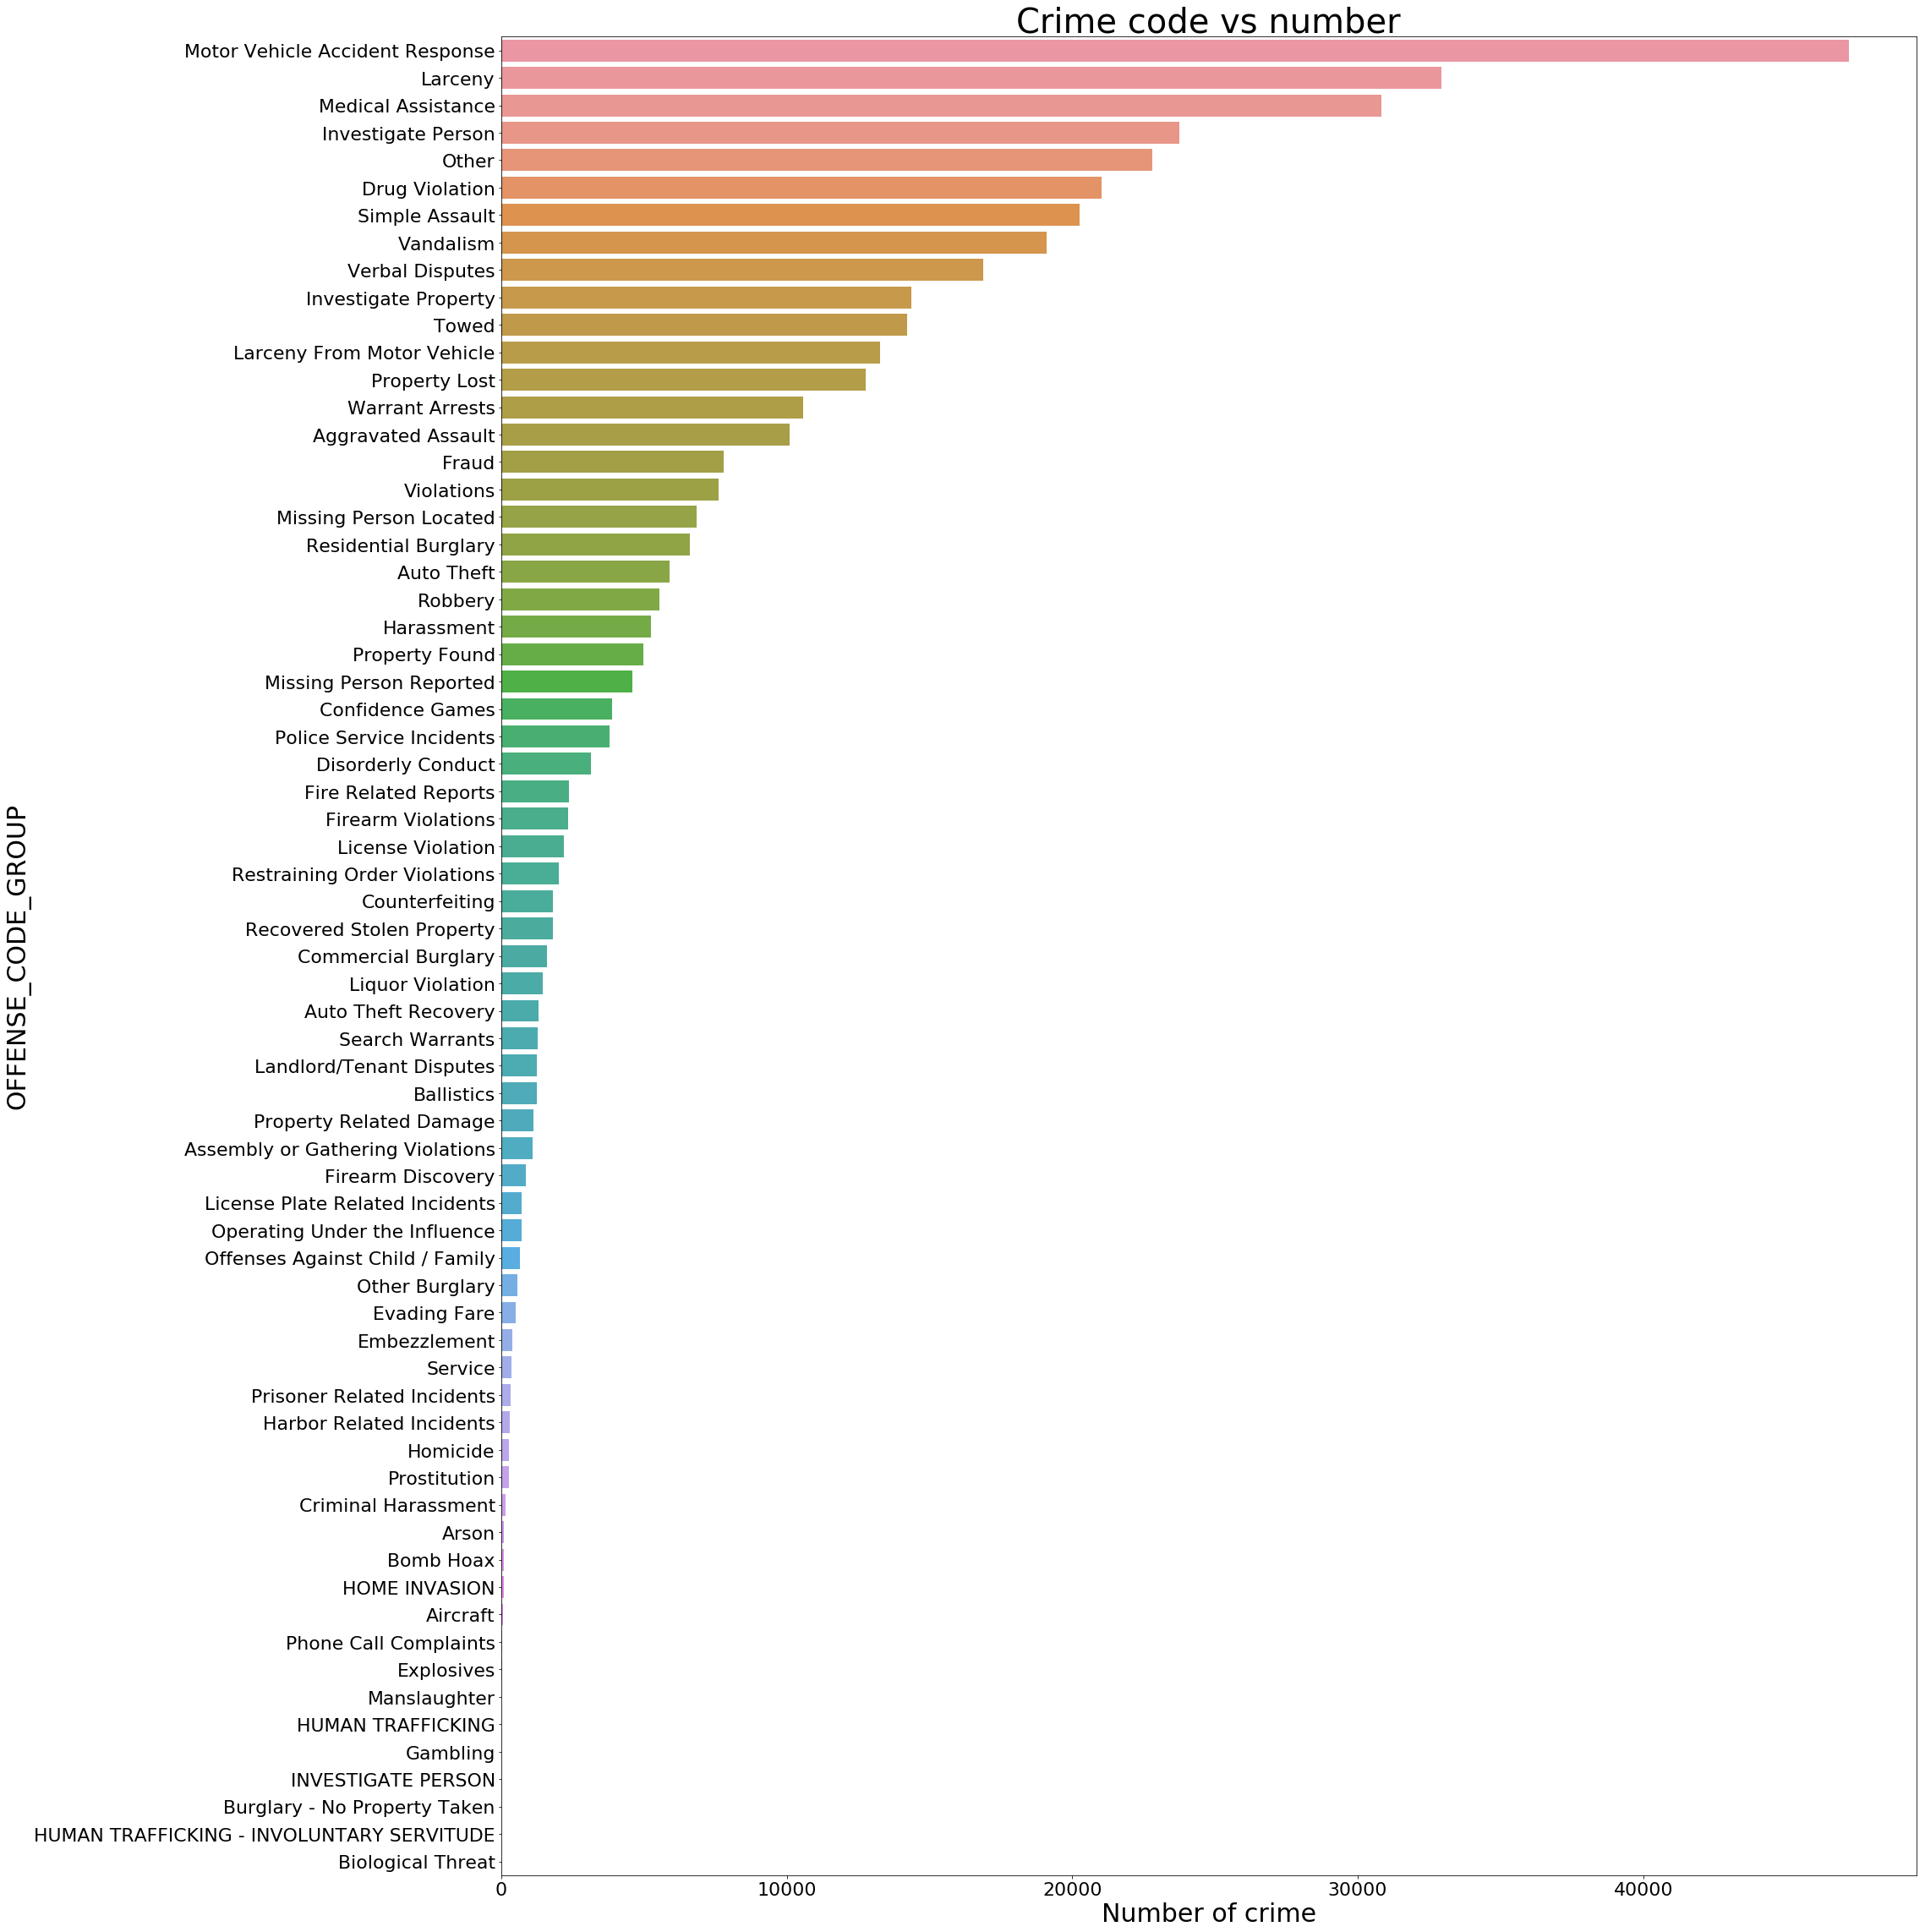

In [446]:
count_crime = count_crime.sort_values("Number of crime", ascending=False)
f, ax = plt.subplots(figsize=(30, 40))
bar = sns.barplot(x='Number of crime', y='OFFENSE_CODE_GROUP', data=count_crime)
bar.axes.set_title("Crime code vs number",fontsize=40)
bar.set_ylabel("OFFENSE_CODE_GROUP",fontsize=30)
bar.set_xlabel("Number of crime",fontsize=30)
bar.tick_params(labelsize=22)

**Removing records that contain at least one empty column.**  

In [ ]:
df_boston.dropna(inplace=True)
district = df_boston['DISTRICT'].unique()

In [ ]:
district

In [ ]:
df_g = df_boston.groupby(['DISTRICT','OFFENSE_CODE_GROUP']).size()
df_g = df_g.to_frame()

In [459]:
df_g.head()

DISTRICT                OFFENSE_CODE_GROUP  COUNT
0       A1                Aggravated Assault   1041
1       A1                             Arson      8
2       A1  Assembly or Gathering Violations    232
3       A1                        Auto Theft    399
4       A1               Auto Theft Recovery     74

Below is listed the districts with regarding to the number of crimes from particular code group 

In [460]:
df_g = (df_boston.groupby(['DISTRICT', 'OFFENSE_CODE_GROUP']).size()  
   .reset_index(name='COUNT'))
district = df_g['DISTRICT'].unique()

In [466]:
df_g_t = (df_boston.groupby(['DISTRICT']).size()  
   .reset_index(name='COUNT'))

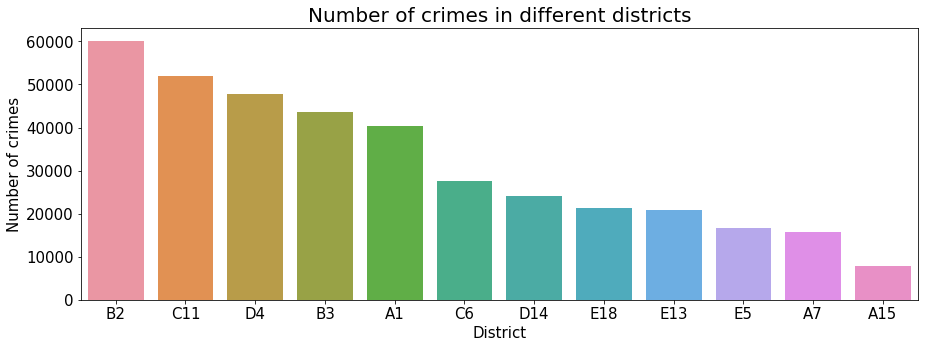

In [484]:
df_g_t = df_g_t.sort_values(by='COUNT', ascending=False)
f, ax = plt.subplots(figsize=(15, 5))
bar = sns.barplot(y="COUNT", x="DISTRICT", data=df_g_t)
bar.set_title("Number of crimes in different districts", fontsize=20)
bar.set_ylabel("Number of crimes",fontsize=15)
bar.set_xlabel("District",fontsize=15)
bar.tick_params(labelsize=15)

In [463]:
df_b = df_g.loc[df_g['DISTRICT'] == district[0]]
df_b.shape

(61, 3)

Using barchart to illustrate the crime idstribution in each district

In [464]:
f, axes = plt.subplots(6, 2, figsize=(50, 220), sharex=False, constrained_layout=True)
sns.despine(left=True)
for row in range(6):
    for col in range(2):
        #print(row*3+col)
        idx = (row*2)+col
        df_b = df_g.loc[df_g['DISTRICT'] == district[idx]]
        df_b = df_b.sort_values(by='COUNT', ascending=False)
        bar = sns.barplot(y="OFFENSE_CODE_GROUP", x="COUNT", data=df_b, ax=axes[row, col])
        #bar.set_xticklabels(bar.get_xticklabels(), rotation=90)
        bar.set_title(district[idx], fontsize=40)
        bar.set_ylabel("OFFENSE_CODE_GROUP",fontsize=30)
        bar.set_xlabel("Number of crime",fontsize=30)
        bar.tick_params(labelsize=28)
        

### Working with Folium map

In [416]:
df_boston_new = df_boston.copy()
df_boston_new.head()

OFFENSE_CODE_GROUP DISTRICT REPORTING_AREA  YEAR  MONTH DAY_OF_WEEK  \
0                 Other       B3            422  2019      7      Sunday   
1  Residential Burglary       B2            585  2019      7      Sunday   
2                 Other       B2            566  2019      7      Sunday   
3               Larceny       A7             26  2019      7      Sunday   
4             Vandalism       B3            427  2019      7      Sunday   

   HOUR        Lat       Long  
0    20  42.271330 -71.082999  
1    21  42.329454 -71.102712  
2    19  42.294999 -71.093066  
3    20  42.376203 -71.039799  
4    20  42.278560 -71.091997

In [417]:
df_boston_new.head()

OFFENSE_CODE_GROUP DISTRICT REPORTING_AREA  YEAR  MONTH DAY_OF_WEEK  \
0                 Other       B3            422  2019      7      Sunday   
1  Residential Burglary       B2            585  2019      7      Sunday   
2                 Other       B2            566  2019      7      Sunday   
3               Larceny       A7             26  2019      7      Sunday   
4             Vandalism       B3            427  2019      7      Sunday   

   HOUR        Lat       Long  
0    20  42.271330 -71.082999  
1    21  42.329454 -71.102712  
2    19  42.294999 -71.093066  
3    20  42.376203 -71.039799  
4    20  42.278560 -71.091997

In [418]:
df_boston_new = df_boston_new.drop_duplicates(subset='DISTRICT', keep='first')
print(df_boston_new)

            OFFENSE_CODE_GROUP DISTRICT REPORTING_AREA  YEAR  MONTH  \
0                        Other       B3            422  2019      7   
1         Residential Burglary       B2            585  2019      7   
3                      Larceny       A7             26  2019      7   
6               Property Found       C6            206  2019      7   
8                      Larceny      E13            576  2019      7   
11              Simple Assault      A15            900  2019      7   
15        Investigate Property      E18            526  2019      7   
18                       Towed       D4            152  2019      7   
20                   Vandalism      D14            770  2019      7   
22             Verbal Disputes      C11            357  2019      7   
25  Larceny From Motor Vehicle       A1            118  2019      7   
26     Missing Person Reported       E5            941  2019      7   

   DAY_OF_WEEK  HOUR        Lat       Long  
0       Sunday    20  42.271330

In [419]:
import folium # map rendering library

In [485]:
# create map of New York using latitude and longitude values
latitude = 42.3601
longitude = -71.0589
map_boston = folium.Map(location=[latitude, longitude], zoom_start=11)  
# add markers to map
for lat, lng, district in zip(df_boston_new['Lat'], df_boston_new['Long'], df_boston_new['DISTRICT']):
    label = '{}'.format(district)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_boston)
    
map_boston

### Working with **Foursquare**

In [421]:
# Foursquare credentials should be replace in below cod
CLIENT_ID = 'xxxxxxxxxxxxxx===========xxxxxxxxxx' # your Foursquare ID
CLIENT_SECRET = 'yyyyyyy============yyyyyyyy' #  Foursquare Secret

VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: TA3O2UUNPDOYBTRP3DMA1Y0ZHDCCCGEHZKO0UEN0LLYYWV2R
CLIENT_SECRET:KMHPB0NX2OWQPVXEETUGZXTFQGNMD2SE0RIZ5WDBAP4LH5YB


In [429]:
def getNearbyVenues(names, latitudes, longitudes, radius=500, LIMIT=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [430]:
boston_venues = getNearbyVenues(names=df_boston_new['DISTRICT'],
                                   latitudes=df_boston_new['Lat'],
                                   longitudes=df_boston_new['Long']
                                  )

B3
B2
A7
C6
E13
A15
E18
D4
D14
C11
A1
E5


In [431]:
print(boston_venues.shape)
boston_venues.head()

(429, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0           B3               42.27133              -71.082999   
1           B3               42.27133              -71.082999   
2           B3               42.27133              -71.082999   
3           B3               42.27133              -71.082999   
4           B3               42.27133              -71.082999   

                           Venue  Venue Latitude  Venue Longitude  \
0  Ryan Spray and Sprinkler Park       42.270769       -71.079626   
1       Valley Road Trolley Stop       42.268426       -71.081535   
2       MBTA Valley Road Station       42.268380       -71.081366   
3                        DIRECTV       42.272387       -71.087079   
4          Big C Painting & More       42.272172       -71.088626   

       Venue Category  
0                Park  
1  Light Rail Station  
2       Metro Station  
3    Business Service  
4        Home Service

In [432]:
print('There are {} uniques categories.'.format(len(boston_venues['Venue Category'].unique())))

There are 139 uniques categories.


Using k-means to cluster the neighborhoods of each districts. 

In [433]:
# one hot encoding
boston_onehot = pd.get_dummies(boston_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
boston_onehot['Neighborhood'] = boston_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [boston_onehot.columns[-1]] + list(boston_onehot.columns[:-1])
boston_onehot = boston_onehot[fixed_columns]

boston_onehot.head()

Yoga Studio  Accessories Store  American Restaurant  Art Gallery  \
0            0                  0                    0            0   
1            0                  0                    0            0   
2            0                  0                    0            0   
3            0                  0                    0            0   
4            0                  0                    0            0   

   Art Museum  Arts & Crafts Store  Asian Restaurant  BBQ Joint  Bagel Shop  \
0           0                    0                 0          0           0   
1           0                    0                 0          0           0   
2           0                    0                 0          0           0   
3           0                    0                 0          0           0   
4           0                    0                 0          0           0   

   Bakery  ...  Sushi Restaurant  Taco Place  Tea Room  Thai Restaurant  \
0       0  ...                 0           0         0                0   
1       0  ...                 0           0         0                0   
2       0  ...                 0           0         0                0   
3       0  ...                 0           0         0                0   
4       0  ...                 0           0         0                0   

   Theater  Tourist Information Center  Vegetarian / Vegan Restaurant  \
0        0                           0                              0   
1        0                           0                              0   
2        0                           0                              0   
3        0                           0                              0   
4        0                           0                              0   

   Vietnamese Restaurant  Wine Bar  Wine Shop  
0                      0         0          0  
1                      0         0          0  
2                      0         0          0  
3                      0         0          0  
4                      0         0          0  

[5 rows x 139 columns]

In [434]:
boston_grouped = boston_onehot.groupby('Neighborhood').mean().reset_index()
boston_grouped.head()

Neighborhood  Yoga Studio  Accessories Store  American Restaurant  \
0           A1         0.01                0.0             0.020000   
1          A15         0.00                0.0             0.000000   
2           A7         0.00                0.0             0.030303   
3           B2         0.00                0.0             0.052632   
4           B3         0.00                0.0             0.000000   

   Art Gallery  Art Museum  Arts & Crafts Store  Asian Restaurant  BBQ Joint  \
0     0.000000         0.0                 0.01              0.02        0.0   
1     0.000000         0.0                 0.00              0.00        0.0   
2     0.030303         0.0                 0.00              0.00        0.0   
3     0.052632         0.0                 0.00              0.00        0.0   
4     0.000000         0.0                 0.00              0.00        0.0   

   Bagel Shop  ...  Sushi Restaurant  Taco Place  Tea Room  Thai Restaurant  \
0         0.0  ...          0.020000         0.0       0.0              0.0   
1         0.0  ...          0.000000         0.0       0.0              0.0   
2         0.0  ...          0.000000         0.0       0.0              0.0   
3         0.0  ...          0.105263         0.0       0.0              0.0   
4         0.0  ...          0.000000         0.0       0.0              0.0   

   Theater  Tourist Information Center  Vegetarian / Vegan Restaurant  \
0     0.05                        0.01                           0.01   
1     0.00                        0.00                           0.00   
2     0.00                        0.00                           0.00   
3     0.00                        0.00                           0.00   
4     0.00                        0.00                           0.00   

   Vietnamese Restaurant  Wine Bar  Wine Shop  
0               0.000000  0.000000       0.01  
1               0.000000  0.083333       0.00  
2               0.030303  0.000000       0.00  
3               0.000000  0.000000       0.00  
4               0.000000  0.000000       0.00  

[5 rows x 139 columns]

Let's print each neighborhood along with the top 10 most common venues

In [435]:
num_top_venues = 10

for hood in boston_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = boston_grouped[boston_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----A1----
                venue  freq
0               Hotel  0.05
1                 Spa  0.05
2         Coffee Shop  0.05
3             Theater  0.05
4  Italian Restaurant  0.04
5      Sandwich Place  0.04
6  Seafood Restaurant  0.04
7                Park  0.04
8         Pizza Place  0.03
9  Chinese Restaurant  0.03


----A15----
               venue  freq
0          Gastropub  0.08
1           Gym Pool  0.08
2         Donut Shop  0.08
3  Convenience Store  0.08
4      National Park  0.08
5      Grocery Store  0.08
6      Boat or Ferry  0.08
7          Surf Spot  0.08
8               Park  0.08
9    Harbor / Marina  0.08


----A7----
                       venue  freq
0         Mexican Restaurant  0.09
1                 Donut Shop  0.09
2                       Park  0.06
3                   Pharmacy  0.06
4             Sandwich Place  0.06
5         Chinese Restaurant  0.06
6  Latin American Restaurant  0.06
7                Gas Station  0.03
8       Colombian Restaurant  0.03
9      

Function to sort the venues in descending order.

In [436]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [437]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = boston_grouped['Neighborhood']

for ind in np.arange(boston_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(boston_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0           A1                 Hotel               Theater   
1          A15        History Museum             Surf Spot   
2           A7            Donut Shop    Mexican Restaurant   
3           B2      Sushi Restaurant        Sandwich Place   
4           B3                  Park    Light Rail Station   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0                   Spa           Coffee Shop        Sandwich Place   
1              Wine Bar         Grocery Store             Gastropub   
2    Chinese Restaurant              Pharmacy                  Park   
3                  Bank                   Gym            Donut Shop   
4          Home Service      Business Service         Metro Station   

  6th Most Common Venue      7th Most Common Venue 8th Most Common Venue  \
0    Italian Restaurant         Seafood Restaurant                  Park   
1            Donut Shop              National Park       Harbor / Marina   
2        Sandwich Place  Latin American Restaurant  Fast Food Restaurant   
3                  Park                   Pharmacy           Pizza Place   
4  Ethiopian Restaurant                Flea Market  Fast Food Restaurant   

  9th Most Common Venue 10th Most Common Venue  
0           Pizza Place  Performing Arts Venue  
1     Convenience Store          Boat or Ferry  
2          Liquor Store     Seafood Restaurant  
3    Light Rail Station                    Pub  
4        Farmers Market            Event Space

In [438]:
boston_grouped.shape

(12, 139)

## CLustering

In [486]:
# set number of clusters
kclusters = 5

boston_grouped_clustering = boston_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(boston_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:50] 

array([2, 2, 2, 2, 3, 0, 2, 2, 2, 2, 1, 4], dtype=int32)

In [487]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

boston_merged = df_boston_new

Rename column "DISTRICT" of boston_merged to "Neighbourhood"

In [488]:
boston_merged.rename(columns={"DISTRICT": "Neighbourhood"}, inplace=True)
boston_merged.head()

OFFENSE_CODE_GROUP Neighbourhood REPORTING_AREA  YEAR  MONTH DAY_OF_WEEK  \
0                 Other            B3            422  2019      7      Sunday   
1  Residential Burglary            B2            585  2019      7      Sunday   
3               Larceny            A7             26  2019      7      Sunday   
6        Property Found            C6            206  2019      7      Sunday   
8               Larceny           E13            576  2019      7      Sunday   

   HOUR        Lat       Long  
0    20  42.271330 -71.082999  
1    21  42.329454 -71.102712  
3    20  42.376203 -71.039799  
6    21  42.352756 -71.047481  
8    19  42.315324 -71.104276

In [489]:
# merge bostjon_grouped with boston_data to add latitude/longitude for each neighborhood
boston_merged = boston_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighbourhood')

#toronto_merged # check the last columns!

In [490]:
# Drop NaN records
boston_merged = boston_merged.dropna()
boston_merged.head()

OFFENSE_CODE_GROUP Neighbourhood REPORTING_AREA  YEAR  MONTH DAY_OF_WEEK  \
0                 Other            B3            422  2019      7      Sunday   
1  Residential Burglary            B2            585  2019      7      Sunday   
3               Larceny            A7             26  2019      7      Sunday   
6        Property Found            C6            206  2019      7      Sunday   
8               Larceny           E13            576  2019      7      Sunday   

   HOUR        Lat       Long  Cluster Labels 1st Most Common Venue  \
0    20  42.271330 -71.082999               3                  Park   
1    21  42.329454 -71.102712               2      Sushi Restaurant   
3    20  42.376203 -71.039799               2            Donut Shop   
6    21  42.352756 -71.047481               2                 Hotel   
8    19  42.315324 -71.104276               2               Brewery   

  2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0    Light Rail Station          Home Service      Business Service   
1        Sandwich Place                  Bank                   Gym   
3    Mexican Restaurant    Chinese Restaurant              Pharmacy   
6    Italian Restaurant      Asian Restaurant            Steakhouse   
8           Coffee Shop         Shopping Mall                  Park   

  5th Most Common Venue 6th Most Common Venue      7th Most Common Venue  \
0         Metro Station  Ethiopian Restaurant                Flea Market   
1            Donut Shop                  Park                   Pharmacy   
3                  Park        Sandwich Place  Latin American Restaurant   
6    Seafood Restaurant                   Bar                Coffee Shop   
8    Mexican Restaurant           Pizza Place             Farmers Market   

     8th Most Common Venue 9th Most Common Venue     10th Most Common Venue  
0     Fast Food Restaurant        Farmers Market                Event Space  
1              Pizza Place    Light Rail Station                        Pub  
3     Fast Food Restaurant          Liquor Store         Seafood Restaurant  
6  New American Restaurant                Bakery                Salad Place  
8       Chinese Restaurant          Liquor Store  Latin American Restaurant

In [491]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

In [504]:
# add markers to the map
markers_colors = []
boston_merged[list(['Cluster Labels'])] = boston_merged[list(['Cluster Labels'])].astype(int)
markers_colors = []
for lat, lon, poi, cluster in zip(boston_merged['Lat'], boston_merged['Long'], boston_merged['Neighbourhood'], boston_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster],
        fill=True,
        fill_color=rainbow[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Results and Discussion <a name="results"></a>

First of all, comparing to other 96 cities (after some empty cities have been removed from the data) in the dataset, violation crime rate in Boston is ranked 45, while Boston locates in 88 among 96 cities based on property crime rates. This statistics make Boston a good place which can be called home.  

The most common crimes in Boston is motor vehicle accidents following by larceny, medical assistance, investigate person and so on.  The top district that crimes mostly happened is B2 following by C11, D4, B3, A1, and so on. The most common crimes in Boston is motor vehicle accidents following by larceny, medical assistance, investigate person and so on.  The top district that crimes mostly happened is B2 following by C11, D4, B3, A1, and so on, while the top venues of B2 are home service, park, business service, light rail station, and metro station. On the other hand, the popular venues of C11 include venue, discount store, southern / soul food, vegetarian / vegan Restaurant, pizza place, and gym. Venues locate around D4 are venue pub, pizza place, bus station, café, grocery, coffee shop, bank, Chinese restaurant, and pharmacy.

The number of crimes happened approximately the same from Monday to Saturday, while on Sunday it went a little bit lower. Moreover, the crime rates in November, December, January, and February are lower than they are in the others months. If we compare this bar chart with the figure describing the weather in Boston over a year, we can see they roughly share the same patterns. This is interesting such that in summer, the number of crimes happen more than in winter. This result make sense such that in winter people travel less and stay at home more. Therefore, the chance of commiting crimes or becoming the victims is less in winter than in summer. 

After applying the clustering method namely K-mean clustering, we can segment the districts into 5 groups based on their neighborhood venues' information. However, the cluster results show that 8 of the twelve districts which are closed to each other belong to a group and the other four districts belong to four group, respectively.  

## Conclusion <a name="conclusion"></a>

In this analysis, we explored the crime rates in Boston according to the districts and crime codes. We further clustered the districts based on the venues's information. We can obtain the popular venues around particular district in Boston and the crime codes in that location.    

## References <a name="reference"></a>

[1] Maure, Diana. "Costs of crime: experts report challenges estimating costs and suggest improvements to better inform policy decisions." (2017).   
[2] https://en.wikipedia.org/wiki/List_of_United_States_cities_by_crime_rate  
[3] https://data.boston.gov/dataset/crime-incident-reports-august-2015-to-date-source-new-system  
[4] Foursquare.com   